In [1]:
import sys
import os


# path = "C:/Users/meide/Documents/GitHub/Master/data"
path = "data/"
os.chdir(path)

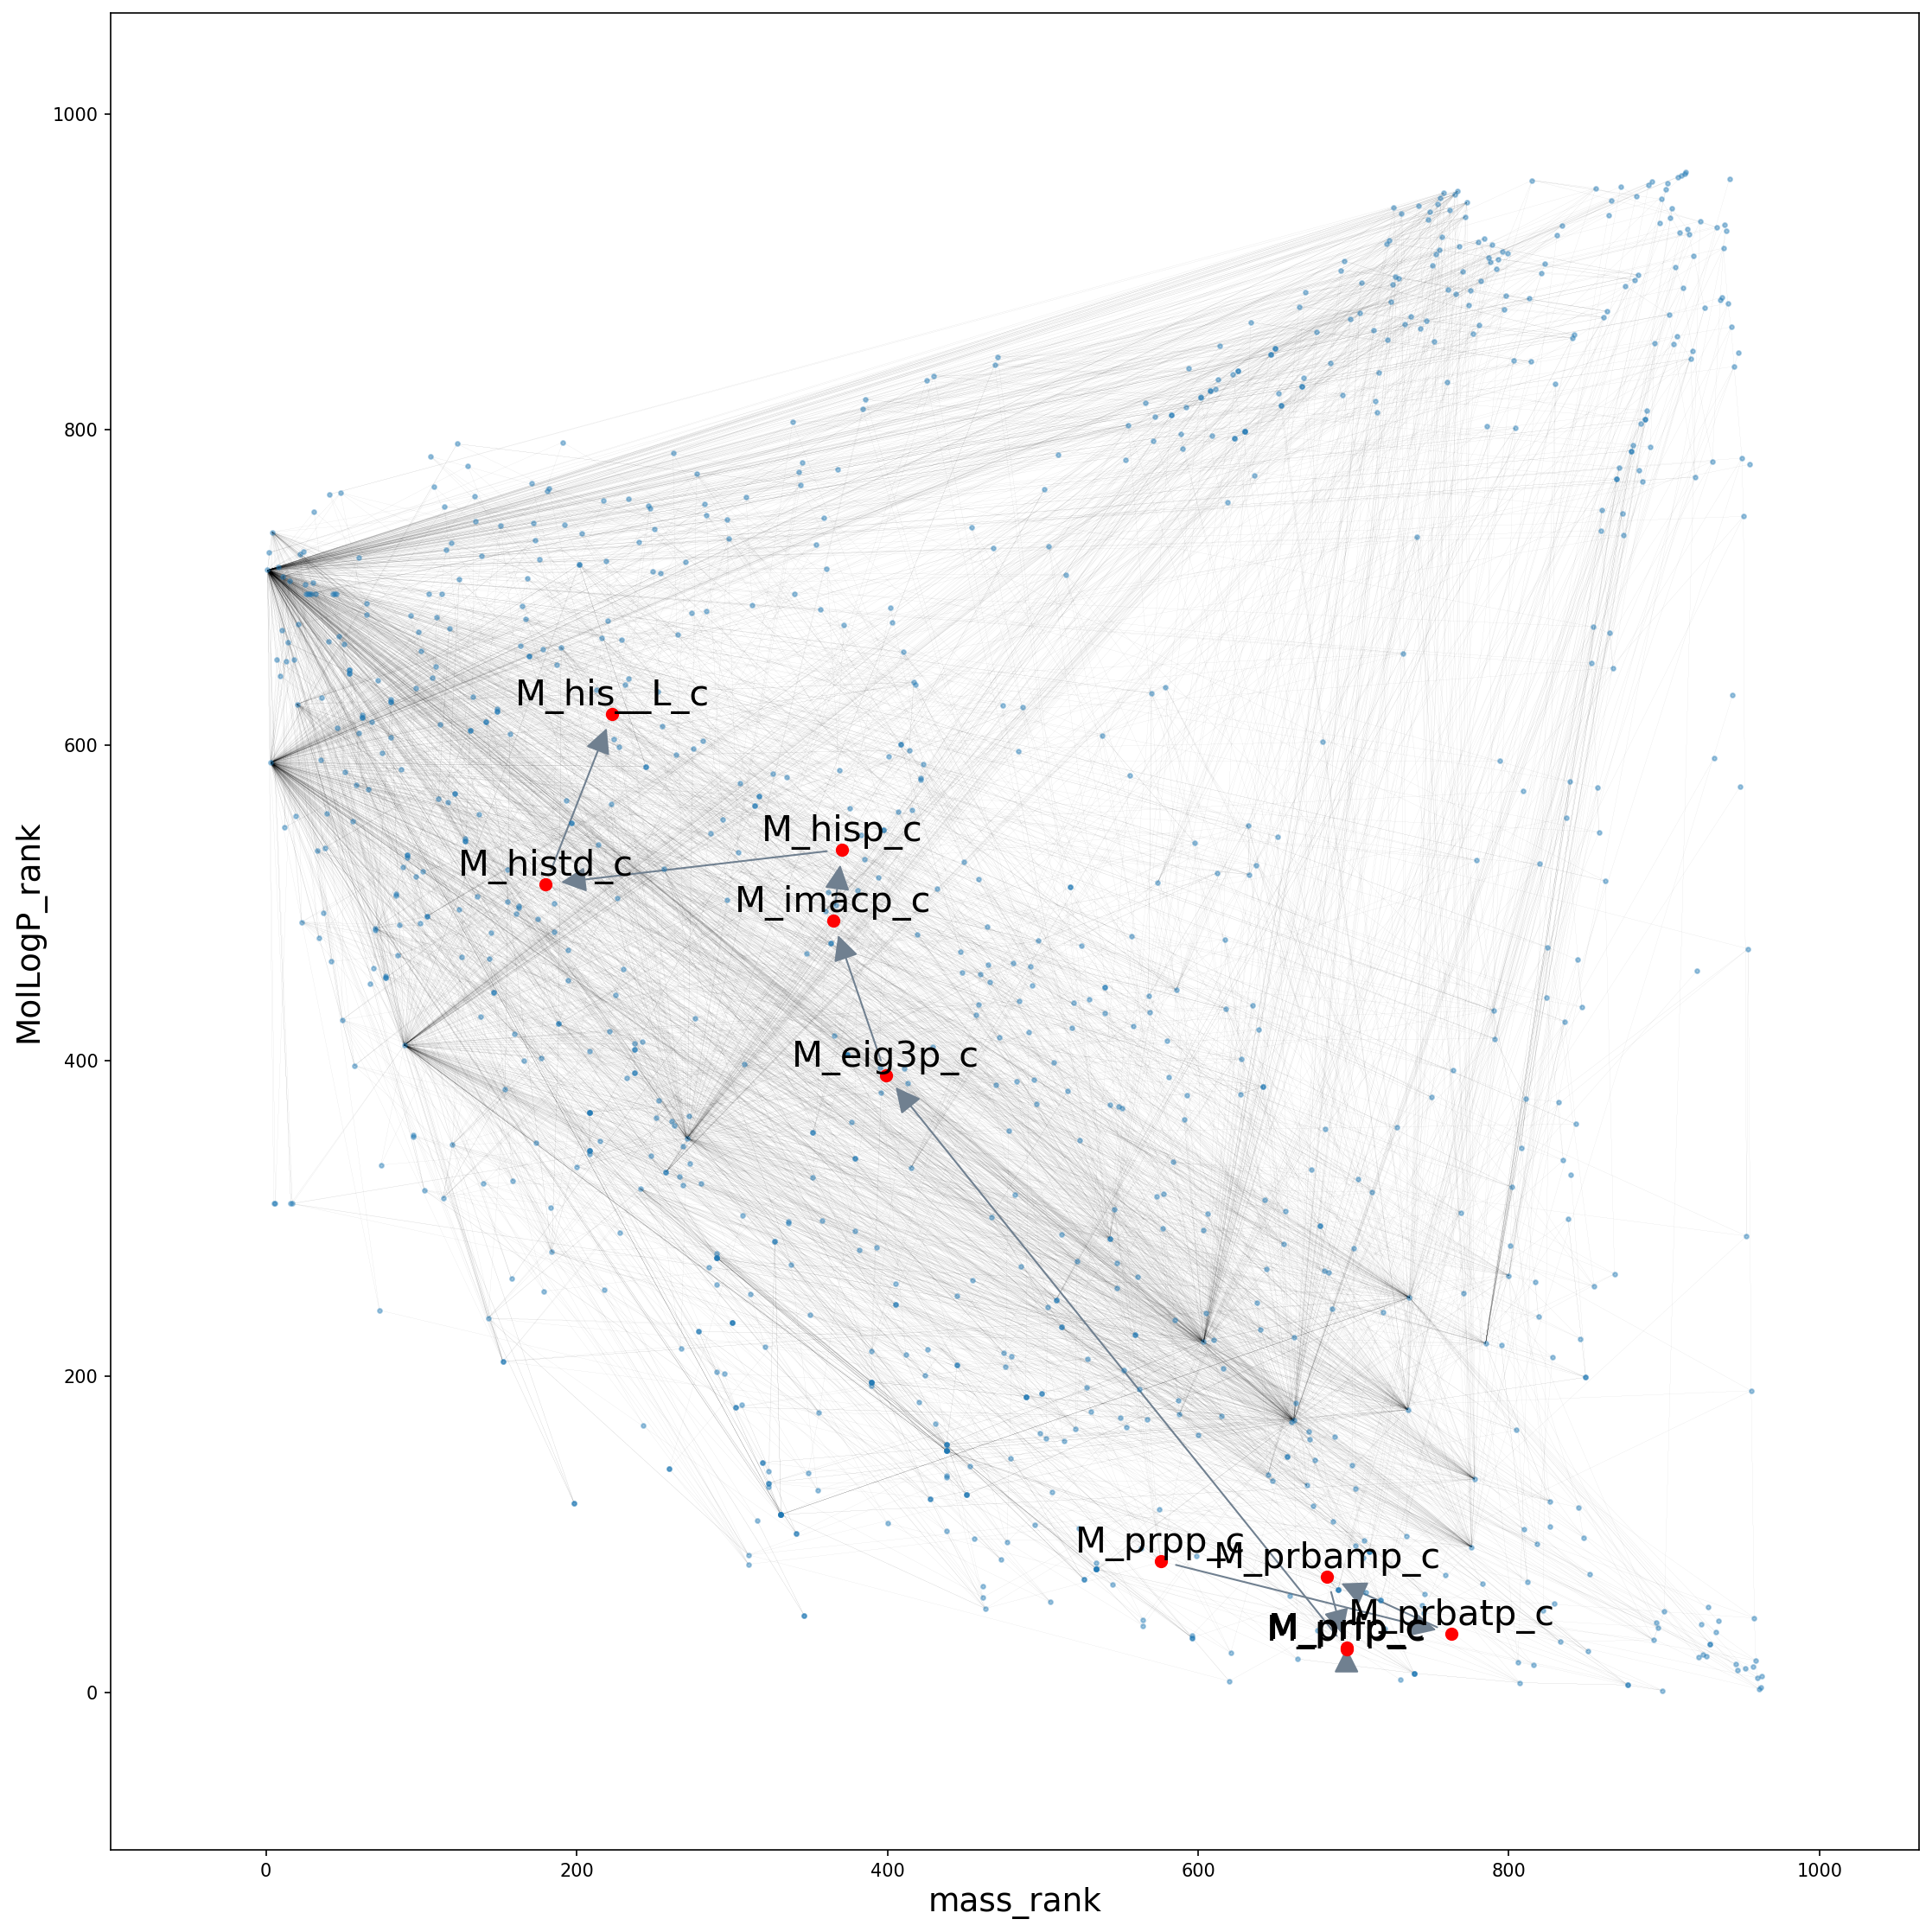

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_com
import numpy as np
import scipy.sparse
import matplotlib.colors as mcolors
import matplotlib.cm as cm




gem = "1515"
Pathway = "Histidine"
x_coord = "mass_rank"
y_coord = "MolLogP_rank"
DescriptorPair = "{}_{}".format(x_coord, y_coord)
file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

fig, ax = plt.subplots(figsize=(15,15), dpi=150)


DriedPeach = pd.read_csv(f"{gem}_edges.csv")
# data2 = pd.read_csv(Pathway + "_plot.csv")

data2 = pd.read_csv(Pathway+".csv")

#Genome-scale metabolic network

sources = DriedPeach["BiGG"]
targets = DriedPeach["target"]
coordinates = DriedPeach[[x_coord, y_coord]].values


edge_data = zip(sources,targets, coordinates)

H = nx.DiGraph()

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    H.add_node(src, pos = c)
    H.add_edge(src,dst)

H.remove_edges_from(nx.selfloop_edges(H))

pos_BC_gem = nx.get_node_attributes(H,'pos')


# Pathway

sources_2 = data2["BiGG"]
targets_2 = data2['target']
coordinates_2 = data2[[x_coord, y_coord]].values

edge_data_2 = zip(sources_2,targets_2, coordinates_2) # targets

G = nx.DiGraph()

for e in edge_data_2:
    src = e[0]
    dst = e[1]
    c = e[2]

    G.add_node(src, pos = c, node_color = 'red')
    G.add_edge(src,dst)

G.remove_edges_from(nx.selfloop_edges(G))


pos_BC_pathway = nx.get_node_attributes(G,'pos')

# GEM network stats


deg_centrality = nx.degree_centrality(H)
cent = np.fromiter(deg_centrality.values(), float)

centrality = np.fromiter(deg_centrality.values(), float)

degree = nx.degree(H)

degree_values = [v for k , v in degree]

degree_values = np.fromiter(degree_values, float)
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

# Pathway network stats
deg_centrality = nx.degree_centrality(G)
centrality = np.fromiter(deg_centrality.values(), float)
degree = nx.degree(G)
degree_values = [v for k , v in degree]

degree_values = np.fromiter(degree_values, float)



# cb = plt.colorbar(scalarmappaple)
# cb.ax.set_title("Node centrality")



# Draw GEM network
nx.draw_networkx_nodes(H, pos_BC_gem, node_size =5, alpha =0.4) 
nx.draw_networkx_edges(H, pos_BC_gem, width = 0.015, arrows = False)

# Draw pathway 
nx.draw_networkx_nodes(G, pos_BC_pathway, node_color = "r", node_size=40)
nx.draw_networkx_edges(G, pos_BC_pathway, width = 1, arrows = True, arrowsize = 30, edge_color ="slategrey")
nx.draw_networkx_labels(G, pos_BC_pathway,verticalalignment= "bottom", font_size =20)


limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.tight_layout()

# plt.savefig(f"Plots/Pathway_overlay/COMPARISON_{gem}_{Pathway}_{file_name}.png", format="PNG")
plt.show()

In [6]:
c_data = nx.cytoscape_data(G)

In [7]:
c_data

{'data': [],
 'directed': True,
 'multigraph': False,
 'elements': {'nodes': [{'data': {'pos': array([576.,  83.]),
     'node_color': 'red',
     'id': 'M_prpp_c',
     'value': 'M_prpp_c',
     'name': 'M_prpp_c'}},
   {'data': {'pos': array([763.,  37.]),
     'node_color': 'red',
     'id': 'M_prbatp_c',
     'value': 'M_prbatp_c',
     'name': 'M_prbatp_c'}},
   {'data': {'pos': array([683.,  73.]),
     'node_color': 'red',
     'id': 'M_prbamp_c',
     'value': 'M_prbamp_c',
     'name': 'M_prbamp_c'}},
   {'data': {'pos': array([695.5,  27. ]),
     'node_color': 'red',
     'id': 'M_prfp_c',
     'value': 'M_prfp_c',
     'name': 'M_prfp_c'}},
   {'data': {'pos': array([695.5,  28. ]),
     'node_color': 'red',
     'id': 'M_prlp_c',
     'value': 'M_prlp_c',
     'name': 'M_prlp_c'}},
   {'data': {'pos': array([399., 391.]),
     'node_color': 'red',
     'id': 'M_eig3p_c',
     'value': 'M_eig3p_c',
     'name': 'M_eig3p_c'}},
   {'data': {'pos': array([365., 489.]),
     'n